In [2]:
# Simulation of Monty Hall problem

import random

def simMontyHall(numTrials, chooseFcn):
    stickWins, switchWins, noWin = (0, 0, 0)
    prizeDoorChoices = [1,2,3]
    guessChoices = [1,2,3]
    for t in range(numTrials):
        prizeDoor = random.choice([1, 2, 3])
        guess = random.choice([1, 2, 3])
        toOpen = chooseFcn(guess, prizeDoor)
        if toOpen == prizeDoor:
            noWin += 1
        elif guess == prizeDoor:
            stickWins += 1
        else:
            switchWins += 1
    return (stickWins, switchWins)

In [3]:
# chooseFcn functions applicable to simMontyHall

# Opens a door that has a goat
def montyChoose(guessDoor, prizeDoor):
    if 1 != guessDoor and 1 != prizeDoor:
        return 1
    if 2 != guessDoor and 2 != prizeDoor:
        return 2
    return 3

# Opens a random door
def randomChoose(guessDoor, prizeDoor):
    if guessDoor == 1:
        return random.choice([2,3])
    if guessDoor == 2:
        return random.choice([1,3])
    return random.choice([1,2])

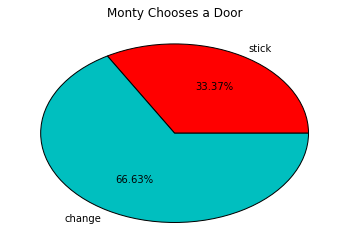

In [10]:
# Display results
%matplotlib inline
import pylab

def displayMHSim(simResults, title):
    stickWins, switchWins = simResults
    pylab.pie([stickWins, switchWins],
              colors = ['r', 'c'],
              labels = ['stick', 'change'],
              autopct = '%.2f%%')
    pylab.title(title)

simResults = simMontyHall(100000, montyChoose)
displayMHSim(simResults, 'Monty Chooses a Door')

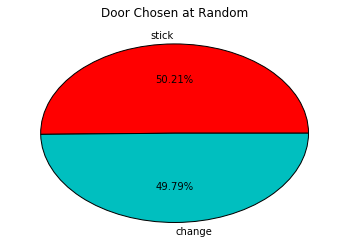

In [8]:
pylab.figure()
simResults = simMontyHall(100000, randomChoose)
displayMHSim(simResults, 'Door Chosen at Random')
pylab.show()